# Attribution:

Data Source: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# Jupyter Notebook Markup Language Editing

Source: https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed

experiment = dataset + code + hyperparameters + compute environment + results

### <b> Open Source Projects of Interest </b>

- <b> Databricks Mlflow </b>

Source: https://mlflow.org/

- <b> Airbnb's Knowledge Repository </b>

As an organization grows, how do we make sure that an insight uncovered by one person effectively transfers beyond the targeted recipient? Internally, we call this scaling knowledge.

Source: https://airbnb.io/projects/knowledge-repo/

- <b> Uber's Manifold </b>

Source: https://eng.uber.com/manifold/

- <b> Uber's casualML Uplift Modelling Package </b>

Source: https://github.com/uber/causalml

# 1. Load Libraries

In [1]:
import helper as hlp

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [3]:
%matplotlib inline

In [4]:
# visualisations

import matplotlib.pyplot as plt
plt.style.use("ggplot")

import seaborn as sns

In [5]:
# data exploration

# from imblearn.over_sampling import SMOTE

In [6]:
# robust statistics

from scipy import stats
from scipy import stats as sp

# test for collinearity

from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
# feature engineering

# import featuretools as ft

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer

In [9]:
# feature selection

# from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, chi2, f_classif

from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold 
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline

In [88]:
# pre-processing

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import LabelBinarizer

from sklearn.preprocessing import PowerTransformer

# shuffle dataframe dataset
from sklearn.utils import shuffle

In [11]:
# model building

# import library for naive bayes
import sklearn.naive_bayes as nb

# import library for logistic regression
from sklearn.linear_model import LogisticRegression as lr

# import library for decision tree
from sklearn import tree

from sklearn.linear_model import SGDClassifier

# import library for random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn import cluster as c1

In [77]:
# from imblearn.ensemble import BalancedBaggingClassifier

from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split, StratifiedKFold

from sklearn.metrics import confusion_matrix, balanced_accuracy_score, roc_curve, precision_recall_curve, auc, make_scorer, precision_score,recall_score, accuracy_score, f1_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

In [14]:
# Abstracted Terminology in Machine Learning

# Estimators
# Optimisers
# Learners
# Classifiers
# Regressors
# Predictors
# Scalers
# Transformers
# Normalizers
# Selectors

# 2. Import Data

In [15]:
# input data

r_filename = 'bank_contacts.csv'

# read the data

data = pd.read_csv(r_filename)

In [16]:
Target = data['credit_application']

# <u> Part 1 </u>

# 3. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is the process of exploring and understanding your data to find patterns, relationships, or anomalies to inform subsequent analysis.

Source: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

In [17]:
data.describe()
data.shape

(41188, 60)

## EDA: Separate Variable Types

In [18]:
# this code is taken from an Udemy online course Deployment of Machine Learning Models

class FeaturePreparer:
    '''
        when we call the Feature preparer for the first time
        we initialise it with the training data set, which is 
        then stored as an attribute(raw_data)
    '''
    def __init__(self, raw_data: pd.DataFrame):
        self.raw_data = raw_data
        self.prepared_data = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.continuous = None
        self.categorical = None
        self.discrete = None
        self.encoding_dict = {}

    def separate_variable_types(self) -> None:
        '''
            find categorical variables
        '''
        self.categorical = [
            var for var in self.raw_data.columns
            if self.raw_data[var].dtype == 'O'
        ]
        print('There are {} categorical variables'.format(len(self.categorical)))

        # find numerical variables
        # this should be done based off training data
        numerical = [var for var in self.raw_data.columns
                     if self.raw_data[var].dtype != 'O']
        print('There are {} numerical variables'.format(len(numerical)))

        # find discrete variables
        # this should be done based off training data, i.e., self.raw_data
        self.discrete = []
        for var in numerical:
            if len(self.raw_data[var].unique()) < 20:
                self.discrete.append(var)

        print('There are {} discrete variables'.format(len(self.discrete)))

        self.continuous = [
            var for var in numerical if
            var not in self.discrete and var not in ['Id', 'SalePrice']
        ]
        
    def split_data(self, *, training: bool = False) -> None:
        # if we are training for the first time, training = True, 
        # then divide into train and test
        if training:
            return
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.prepared_data, self.prepared_data.SalePrice, test_size=0.2, random_state=0)

        print(self.X_train.shape, self.X_test.shape)

In [19]:
# handle missing data
# rare imputation
# encode categorical variables
# prepare data

In [20]:
C = FeaturePreparer(data)

C.separate_variable_types()

There are 0 categorical variables
There are 60 numerical variables
There are 54 discrete variables


## EDA: Data Visualisation

Source: https://stackabuse.com/seaborn-library-for-data-visualization-in-python-part-1/

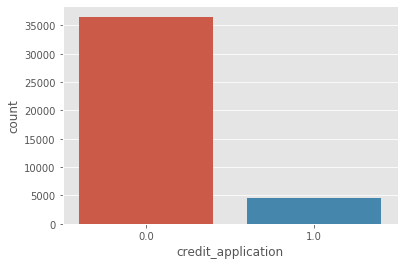

In [21]:
# output bar chart

sns.countplot(x='credit_application', data=data)

## EDA: Missing Values

In [22]:
# Count all NaN in a DataFrame (both columns & Rows)
data.isnull().sum().sum()

# Count total NaN at each column in DataFrame
data.isnull().sum().head()

n_age             0
n_duration        0
n_pdays           0
n_previous        0
n_emp_var_rate    0
dtype: int64

In [23]:
# this code is taken from Udemy online course Deployment of Machine Learning Models

def handle_missing_values(self):
    
    '''
        fills NA in all required variables
    '''
    
    for col in self.continuous:
        if self.prepared_data.loc[:, (col)].isnull().mean() > 0:
            # get the mean value from the training data, i.e., self.raw_data
            mean_val = self.raw_data.loc[:, (col)].mean()
            # replace it in the data to be passed to the model, i.e., self.prepared_data
            self.prepared_data[col].fillna(mean_val, inplace=True)

    # add label indicating 'Missing' to categorical variables
    for var in self.categorical:
        # replace NA in all categorical variables to be passed to the model
        self.prepared_data[var].fillna('Missing', inplace=True)

## EDA: Imbalanced Datasets


An imbalanced dataset is one where the number of observations belonging to one group or class is significantly higher than those belonging to the other classes.

Machine Learning algorithms are very likely to produce faulty classifiers when they are trained with imbalanced datasets. These algorithms tend to show a bias for the majority class, treating the minority class as a noise in the dataset. With many standard classifier algorithms, such as Logistic Regression, Naive Bayes and Decision Trees, there is a likelihood of the wrong classification of the minority class.

#### Methods of Handling Imbalanced Datasets

Oversampling: This method involves reducing or eliminating the imbalance in the dataset by replicating or creating new observations of the minority class. 

#### Oversampling Techniques:

1. Random Oversampling
2. Cluster-Based Oversampling
3. Synthetic Oversampling
4. Modified Synthetic Oversampling

#### Undersampling Techniques:

1. Random Undersampling

Source: https://medium.com/coinmonks/handling-imbalanced-datasets-predicting-credit-card-fraud-544f5e74e0fd

Source: https://www.datacamp.com/community/tutorials/diving-deep-imbalanced-data

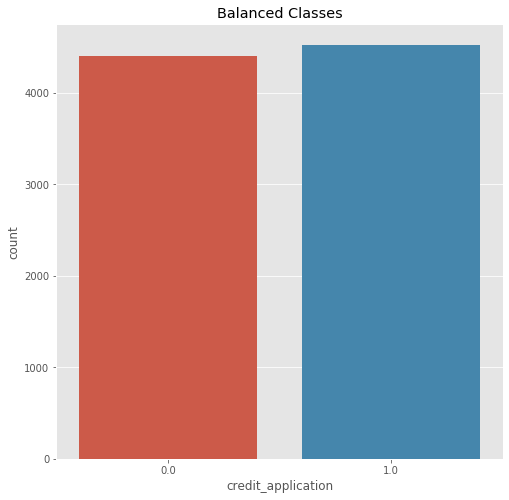

In [24]:
# Undersampling
# sample size is manually chosen by the user

# shuffle the dataset and select n observations
shuffled_df = data.sample(n=40000,random_state=4, replace=True)

# Put all the credit_application in a separate dataset.
c_app_df = shuffled_df.loc[shuffled_df['credit_application'] == 1]

# Randomly select n observations from the non-fraud (majority class)
c_non_app_df = shuffled_df.loc[shuffled_df['credit_application'] == 0].sample(n=4400,random_state=42, replace=True)

# Concatenate both dataframes again
balanced_data = pd.concat([c_app_df, c_non_app_df])

# plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('credit_application', data=balanced_data)
plt.title('Balanced Classes')
plt.show()

In [25]:
balanced_data.shape

(8929, 60)

## EDA: Check Collinearity of Features

- Multicollinearity: Occurs when independent variables in a regression model are correlated.
- Structural Multicollinearity:
- Data Multicollinearity:

<b> Methods to Find Collinearity </b>

- Principal Component Analysis (PAC): 
- Using Variance Inflation Factor (VIF): We can determine if two independent variables are collinear with each other. 
- Analysis of Variance (ANOVA): 


<b> Notes: </b>

Multicollinearity makes it difficult to ascertain how important a feature is to the target variable.

Source: https://towardsdatascience.com/multicollinearity-in-data-science-c5f6c0fe6edf

In [26]:
X = data.drop(['credit_application'], axis=1)
y = data['credit_application']

In [27]:
class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=10.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'Imputer'):
            self.Imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'Imputer'):
            X = pd.DataFrame(self.Imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)
    
    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [28]:
Balanced_X = balanced_data.drop(['credit_application'], axis=1)
y = balanced_data['credit_application']

In [29]:
transformer = ReduceVIF()

# Iterates through specified columns in the dataset
# Only use n columns for speed in this example
X = transformer.fit_transform(Balanced_X[Balanced_X.columns[-60:]], y)

ReduceVIF fit
ReduceVIF transform
Dropping job_admin with vif=inf
Dropping marital_divorced with vif=inf
Dropping edu_basic_4y with vif=inf
Dropping housing_unknown with vif=inf
Dropping contact_cellular with vif=inf
Dropping prev_ctc_outcome_failure with vif=inf
Dropping month_apr with vif=inf
Dropping n_nr_employed with vif=170.9065365312705
Dropping n_emp_var_rate with vif=90.42046974350791
Dropping dow_thu with vif=48.941561252071565
Dropping n_pdays with vif=41.16610915451281
Dropping prev_ctc_outcome_nonexistent with vif=15.064931009963574
Dropping n_cons_price_idx with vif=11.978598814409073


## EDA: Find Empirical and Fit Theoretical Distributions to Features

- Normal Distribution: This is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

Source: https://docs.pymc.io/Probability_Distributions.html

Source: https://medium.com/@nsethi610/data-cleaning-scale-and-normalize-data-4a7c781dd628

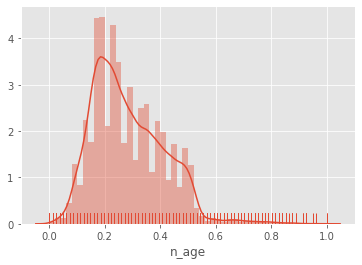

In [30]:
sns.distplot(data['n_age'], kde=True, rug=True);

In [31]:
# There are 82 distribution python packages

sub_dist = ['uniform', 'norm', 'gamma', 'lognorm', 'chi2']
dist_names = [ 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 
              'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 
              'erlang', 'expon', 'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 
              'foldcauchy', 'foldnorm', 'frechet_r', 'frechet_l', 'genlogistic', 'genpareto', 
              'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic', 'gilbrat', 
              'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 
              'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 'laplace', 
              'logistic', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'nakagami', 'ncx2', 
              'ncf', 'nct', 'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'reciprocal', 
              'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 't', 'triang', 'truncexpon', 'truncnorm', 
              'tukeylambda', 'uniform', 'vonmises', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy']

In [32]:
# store all the python distribution packages to a python list

dist_continu = [d for d in dir(stats) if
                 isinstance(getattr(stats, d), stats.rv_continuous)]
dist_discrete = [d for d in dir(stats) if
                  isinstance(getattr(stats, d), stats.rv_discrete)]

In [33]:
# create Class with methods to fit python distributions to data

class Distribution(object):
    
    def __init__(self,dist_names_list = []):
        self.dist_names_c = dist_continu
        self.dist_names_d = dist_discrete
        self.dist_results = []
        self.params = {}
        
        self.DistributionName = ""
        self.PValue = 0
        self.Param = None
        
        self.isFitted = False
        
    # for continous variables
    # finds the best fitted distribution
    
    def Fit_C(self, y):
        self.dist_results = []
        self.params = {}
        for dist_name in self.dist_names_c:
            dist = getattr(sp, dist_name)
            param = dist.fit(y)

            self.params[dist_name] = param
            #Applying the Kolmogorov-Smirnov test
            D, p = sp.stats.kstest(y, dist_name, args=param)
            self.dist_results.append((dist_name,p))
        #select the best fitted distribution
        sel_dist,p = (max(self.dist_results,key=lambda item:item[1]))
        #store the name of the best fit and its p value
        self.DistributionName = sel_dist
        self.PValue = p

        self.isFitted = True
        return self.DistributionName, self.PValue
    
    # for discrete variables
    # finds the best fitted distribution

    def Fit_D(self, y):
        self.dist_results = []
        self.params = {}
        for dist_name in self.dist_names_d:
            dist = getattr(sp, dist_name)
            param = dist.fit(y)

            self.params[dist_name] = param
            #Applying the Kolmogorov-Smirnov test
            D, p = sp.stats.kstest(y, dist_name, args=param)
            self.dist_results.append((dist_name,p))
        #select the best fitted distribution
        sel_dist,p = (max(self.dist_results,key=lambda item:item[1]))
        #store the name of the best fit and its p value
        self.DistributionName = sel_dist
        self.PValue = p

        self.isFitted = True
        return self.DistributionName, self.PValue

In [36]:
# select a sample and output distribution

s = balanced_data.sample(n=50,random_state=4, replace=True)

D = Distribution()
D.Fit_C()

TypeError: Fit_C() missing 1 required positional argument: 'y'

In [ ]:
D.Fit_C(s['n_duration'])

## EDA: Check Skew of Feature Distributions

#### Notes:

- Goodness-of-fit (GOF) tests are not very informative when the sample size is very small or very large.
- Log Transformation:
- Cube Root Transformation: 

Source: https://blogs.sas.com/content/iml/2016/11/28/goodness-of-fit-large-small-samples.html

In [ ]:
data['n_age'].plot.hist(bins=12, alpha=0.5)

In [ ]:
# testing purposes - transform distribution of feature

s = balanced_data.sample(n=500,random_state=4, replace=True)

d = s['n_age']**(1/3)
d.plot.hist(bins=12, alpha=0.5)

In [ ]:
csv_desc = balanced_data.describe()

csv_desc['skew'] = csv_desc.skew(numeric_only=True)

In [ ]:
get_best_distribution(ss['n_age'])

## EDA: Optimise Curve-Fitting of Distribution to Feature

### Statistical Tests

Source: https://towardsdatascience.com/data-science-simplified-hypothesis-testing-56e180ef2f71

# 4. Data Preprocessing

## Data Preprocessing: Replace Missing / NaN with Mean

#### Note: 

The Mean is not a robust measure of central tendency due to the possibility of influence by Outliers.

#### Alternatives:

- Median

Source: https://en.wikipedia.org/wiki/Robust_statistics

In [ ]:
data.apply(lambda x: x.fillna(x.mean()),axis=0)

## Data Preprocessing: Scaling Feature

Scaling: Transforming your data so that it fits within a specific scale, like 0–100 or 0–1.

- StandardScaler: Removes the mean and scales the data to unit variance. 
- MinMaxScaler: Rescales the data set such that all feature values are in the range [0, 1].
- MaxAbsScaler: Differs from the previous scaler such that the absolute values are mapped in the range [0, 1].
- RobustScaler: Unlike the previous scalers, the centering and scaling statistics of this scaler are based on percentiles and are therefore not influenced by a few number of very large marginal outlier.

Source: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [ ]:
X = data

distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Data after power transformation (Yeo-Johnson)',
     PowerTransformer(method='yeo-johnson').fit_transform(X)),
    ('Data after power transformation (Box-Cox)',
     PowerTransformer(method='box-cox').fit_transform(X)),
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X)),
]

In [ ]:
# Create an scaler object

sc = StandardScaler()

Scaler = MinMaxScaler()

## Data Preprocessing: Transforming Feature Distribution

Normalization: Change your observations so that they can be described as a normal distribution. In general, you’ll only want to normalize your data if you’re going to be using a machine learning or statistics technique that assumes your data is normally distributed.

- PowerTransformer: Applies a power transformation to each feature to make the data more Gaussian-like. Currently, PowerTransformer implements the Yeo-Johnson and Box-Cox transforms.
- QuantileTransformer (Gaussian Output):
- QuantileTransformer (Uniform Output):
- Normalizer: 


Refer to the type of distribution.

- QuantileTransformer provides non-linear transformations in which distances between marginal outliers and inliers are shrunk. 

- PowerTransformer provides non-linear transformations in which data is mapped to a normal distribution to stabilize variance and minimize skewness.

- On “small” datasets (less than a few hundred points), the quantile transformer is prone to overfitting. The use of the power transform is then recommended. 

Source: https://medium.com/@nsethi610/data-cleaning-scale-and-normalize-data-4a7c781dd628

Source: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html

Source: https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16

Source: https://medium.com/@ODSC/transforming-skewed-data-for-machine-learning-90e6cc364b0

Source: https://datamadness.github.io/Skewness_Auto_Transform

# 5. Feature Engineering


- Feature Encoding (One Hot Encoding, Label Encoding): 
- Deep Feature Synthesis: 
- Memory Reduction: 
- Remove Outliers: 
- Replace / Delete NAN: 
- Combining / Splitting: 
- Normalize / Standardize: 
- Isolation Forest: 

Source: https://towardsdatascience.com/feature-engineering-techniques-in-python-97977ecaf6c8

Source: https://www.kdnuggets.com/2019/08/4-tips-advanced-feature-engineering-preprocessing.html

## Feature Reduction: Principal Component Analysis (PAC)

In [ ]:
import sklearn.decomposition as dc

In [ ]:
def reduce_PCA(x, n):
    '''
        Reduce the dimensions using Principal Component Analysis
    '''
    # create the PCA object
    # reduce dimension to the first 'n' variables by estimating a PCA model with dc (sklearn)
    
    pca = dc.PCA(n_components=n, whiten=True)

    # learn the principal components from all the features
    # fit a PCA model by using input 'x' array
    # return a pca.fit() object
    
    return pca.fit(x)

In [ ]:
p = reduce_PCA(balanced_data, 10)

In [ ]:
pc = p.transform(balanced_data)
pc

## Feature Selection

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

Irrelevant or partially relevant features can negatively impact model performance.

<b> Benefits of Feature Selection </b>

- Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
- Improves Accuracy: Less misleading data means modeling accuracy improves.
- Reduces Training Time: Less data means that algorithms train faster.

<b> Techniques </b>

- Univariate Selection: Selects features that have the strongest relationship with the output variable.
- Recursive Feature Elimination: 
- Principal Component Analysis: 
- Feature Importance: 

Source: https://machinelearningmastery.com/feature-selection-machine-learning-python/

Source: https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [37]:
# feature extraction using Univariate Selection
# select a machine learning model to create an object. In this example logistic regression is chosen.

model = lr(solver='lbfgs')
rfe = RFE(model, 8)
fit = rfe.fit(X, y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 8
Selected Features: [False  True False  True  True False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False  True False False False
 False  True  True False  True False False False False False]
Feature Ranking: [ 4  1  6  1  1 19 12  5 14  3 18 21 33 28 34 11 22 37  1 38 24 35 23 31
 13 17  2 39 27 26 15 25  1  9 36 10  8  1  1 30  1 29 20 32 16  7]


In [ ]:
# Simple usage of Pipeline 
# that runs successively a univariate feature selection with anova and then a SVM of the selected features.

X, y = make_classification(
    n_features=20, n_informative=3, n_redundant=0, n_classes=4,
    n_clusters_per_class=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# ANOVA SVM-C
# 1) anova filter, take 3 best ranked features
anova_filter = SelectKBest(f_regression, k=3)
# 2) svm
clf = svm.LinearSVC()

anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)
y_pred = anova_svm.predict(X_test)
print(classification_report(y_test, y_pred))

coef = anova_svm[:-1].inverse_transform(anova_svm['linearsvc'].coef_)
print(coef)

In [42]:
# Create and fit selector
selector = SelectKBest(f_classif, k=10)
selector.fit(X, y)

# Get columns to keep
cols = selector.get_support(indices=True)

# Create new dataframe with only desired columns, or overwrite existing
features_df_new = X.iloc[:,cols]
features_df_new.head(0).T

""
n_duration
n_previous
n_euribor3m
job_retired
default_unknown
contact_telephone
prev_ctc_outcome_success
month_mar
month_may
month_oct


In [39]:
# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  # print 10 best features

                       Specs       Score
32  prev_ctc_outcome_success  675.033761
4                n_euribor3m  637.892378
31         contact_telephone  423.845057
26           default_unknown  282.587124
38                 month_may  210.926902
40                 month_oct  209.162464
37                 month_mar  206.131305
2                 n_previous  141.025529
1                 n_duration  131.394546
9                job_retired  116.582901


In [43]:
# feature extraction using Feature Importance
# select a machine learning model to create an object. In this example logistic regression is chosen.

model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
print(model.feature_importances_)

[6.84291221e-02 2.58558675e-01 3.23467829e-02 3.89944591e-02
 1.40063251e-01 1.10818557e-02 7.10885080e-03 3.69581685e-03
 9.76045730e-03 8.43426508e-03 6.07526755e-03 8.98055376e-03
 6.37089129e-03 1.43641208e-02 4.16316684e-03 2.60164971e-03
 1.55694576e-02 1.39074679e-02 4.93850669e-04 5.37552358e-03
 1.11130117e-02 1.40708907e-02 2.08403737e-04 1.01521842e-02
 1.19124694e-02 7.41320986e-03 2.49809590e-02 0.00000000e+00
 2.47023908e-02 3.88843370e-03 1.77587911e-02 2.31778675e-02
 4.17205912e-02 6.16253899e-03 2.53799035e-03 7.39671127e-03
 5.52110293e-03 1.09963822e-02 3.46468572e-02 1.06208134e-02
 1.30421588e-02 2.76854695e-03 1.63759706e-02 1.47991055e-02
 1.37057839e-02 1.39513492e-02]


In [ ]:
'''
# Build RF classifier to use in feature selection

clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=5,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)
'''

In [ ]:
'''
# Which features to select

feat_cols = list(sfs1.k_feature_idx_)

print(feat_cols)
'''

# <u> Part 2 </u>

### Notes:

#### Shortcomings of Different Machine Learning Models and How to Resolve Them

- Unscaled data can also slow down or even prevent the convergence of many gradient-based estimators.

- Metric-based and gradient-based estimators often assume approximately standardized data.

## Parameters of Model

In [44]:
# logistic regression
# replace with any other python model object

lr().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

## Splitting Data

In [ ]:
# load original dataset and split into train and test datasets

train_x, train_y, test_x, test_y, labels = hlp.split_data(data, y='credit_application')
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
train_x, train_y, test_x, test_y, labels = hlp.split_data(balanced_data, y='credit_application')

# 7. Model Building: Supervised Learning

## Regularision: Ridge (R1), Lasso (R2) and Elastic Net

To produce a more accurate model of complex data we can add a penalty term to the OLS equation. A penalty adds a bias towards certain values.

Source: https://www.knime.com/blog/regularization-for-logistic-regression-l1-l2-gauss-or-laplace?utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com

### Encoding Nonlinearity

<b> Feature Cross </b>: Synthetic frature that encodes nonlinearity in the feature space by multuplying two or more input features together.

Source: https://developers.google.com/machine-learning/crash-course/feature-crosses/encoding-nonlinearity

## Bayesian View of Regularisation

## Naive Bayes

In [ ]:
# define a new method and 'decorate' it with the .timeit() method in helper.py

@hlp.timeit
def fitNaiveBayes(x,y):
    
    '''
        Build the Naive Bayes classifier
    '''
    
    # create the classifier object; we use Gaussian NBs.
    naiveBayes_classifier = nb.GaussianNB()

    # fit the model; every classifier object has a .fit() method.
    return naiveBayes_classifier.fit(x,y)

In [ ]:
# split the data into a training set and a testing set by calling the .split_data() method
# in helper.py. The default text size is 1/3 of the data; you can change this, too.
# Mind the output of the method including train_x, train_y, test_x, test_y, and labels

# train the model by using train_x and train_y sets.
classifier = fitNaiveBayes(train_x, train_y)

# classify the test data by using the test_x dataset, and predict the results.
predicted = classifier.predict(test_x)

# print out the results by calling the printModelSummary()

hlp.printModelSummary(test_y, predicted)

## Logistic Regression

#### Probability and Likelihood

The distinction between probability and likelihood is fundamentally important: Probability attaches to possible results; likelihood attaches to hypotheses.

#### Loss / Cost Function

Maximum likelihood estimation (MLE) is a method of estimating the parameters of a statistical model given observations, by finding the parameter values that maximize the likelihood of making the observations given the parameters.

- MLE is consistent with Ordinary Least Square (OLS).
- With infinite data, it will estimate the optimal β, and approximate it well for small but robust datasets.
- MLE is efficient; no consistent estimator has lower asymptotic mean squared error than MLE.

Then why use MLE for Logistic Regression optimisation instead of OLS

- MLE is generalizable for regression and classification.
- MLE is efficient; no consistent estimator has lower asymptotic error than MLE if you’re using the right distribution.

Source: https://towardsdatascience.com/a-gentle-introduction-to-maximum-likelihood-estimation-9fbff27ea12f

In [ ]:
@hlp.timeit

def LogitClassifier(X):
    
    '''
        Build a Logistic Regression classifier
    '''
    
    train_X, train_y, test_X, test_y, labels = hlp.split_data(X, y = 'credit_application')
    
    L = lr()
    LF = L.fit(train_X, train_y)
    predicted = LF.predict(test_X)
    summary = hlp.printModelSummary(test_y, predicted)
    
    return summary

In [ ]:
# run original data without preprocessing

LogitClassifier(data)

In [ ]:
# run data after preprocessing at achieve balance in the target classes

LogitClassifier(balanced_data)

## Decision Tree

In [ ]:
# define a fitDecisionTree() method and 'decorate' with @hlp.timeit, so we can time
# how long it takes to run the model fitting process

@hlp.timeit
def fitDecisionTree(x,y):
    
    '''
        Build a decision tree classifier
    '''
    
    # create the classifier object
    # we specify that any decision node cannot hold less than 1,000 data points
    # because we have quite some data
    
    decision_tree = tree.DecisionTreeClassifier(min_samples_split=1000)

    # fit the data
    return decision_tree.fit(x,y)

In [ ]:
# train the DT model
classifier = fitDecisionTree(train_x, train_y)

# classify the test data
predicted = classifier.predict(test_x)

# print out the results
hlp.printModelSummary(test_y, predicted)

In [ ]:
'''
# Bagging classifier

# Example one
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                 sampling_strategy='auto',
                                 replacement=False,
                                 random_state=0)
bbc.fit(X_train, y_train) 
y_pred = bbc.predict(X_test)
balanced_accuracy_score(y_test, y_pred)
'''

## Ensemble Learning

#### Introduction to Ensemble Learning

Basic Ensemble Techniques
- Max Voting
- Averaging
- Weighted Average

Advanced Ensemble Techniques
- Stacking
- Blending
- Bagging
- Boosting

Algorithms based on Bagging and Boosting
- Bagging meta-estimator
- Random Forest
- AdaBoost
- GBM
- XGB
- Light GBM
- CatBoost

## Random Forest

In [ ]:
# We've already imported the following libs:
# import helper as hlp
# import pandas as pd
# import sklearn.tree as sk

import sklearn.ensemble as en


#define a fitRandomForest() method so we can throw our data into it, time its execution and run the model.

@hlp.timeit
def fitRandomForest(x,y):
    
    '''
        Build a random forest classifier
    '''
    
    # create the classifier object; minimum 100 samples at each node to perform a split.
    # default to form 10 trees in the forest; can be adjusted as wish.
    
    forest = en.RandomForestClassifier(min_samples_split=100, n_estimators=10)

    # fit the data
    
    return forest.fit(x,y)

In [ ]:
# split the data into training and testing sets as usual.
# we still predict on the same Y (credit_application) and use only a sub-set of the whole X.

trainForest_x, trainForest_y,testForest_x,  testForest_y, forest_labels = hlp.split_data(
    data, 
    y = 'credit_application',
    x = ['n_duration','n_nr_employed',
        'prev_ctc_outcome_success','n_euribor3m',
        'n_cons_conf_idx','n_age','month_oct',
        'n_cons_price_idx','edu_university_degree','n_pdays',
        'dow_mon','job_student','job_technician',
        'job_housemaid','edu_basic_6y']
)

In [ ]:
# Run the Random Forest Classifer
forest_classifier = fitRandomForest(trainForest_x, trainForest_y)

# classify the testing data set
forest_predicted = forest_classifier.predict(testForest_x)

# print out the results
hlp.printModelSummary(testForest_y, forest_predicted)

# 8. Model Building: Unsupervised Learning

## K-Means Clustering

In [ ]:
# define the findClusters_Kmeans() method, so we can call it in our Python script

@hlp.timeit
def findClusters_kmeans(data):
    
    '''
        Cluster data using K-means
    '''
    
    # create the Kmenas classifier object by calling cl.KMeans(); 
    # by default, we estimate 4 clusters.
    # The n_init parameter controls how many models to estimate by KMeans().
    
    kmeans = c1.KMeans(n_clusters=4,n_jobs=-1,verbose=0,n_init=30)

    # fit the data
    return kmeans.fit(data)

In [ ]:
# select variables (columns) that we are interested in to cluster

selectedVars = data[
        ['n_duration',
         'n_nr_employed',
        'prev_ctc_outcome_success',
         'n_euribor3m',
        'n_cons_conf_idx',
         'n_age','month_oct',
        'n_cons_price_idx',
         'edu_university_degree',
         'n_pdays',
        'dow_mon',
         'job_student',
         'job_technician',
        'job_housemaid',
         'edu_basic_6y']]

In [ ]:
# cluster the data by calling the method findClusters_kmeans()

cluster = findClusters_kmeans(selectedVars)

In [ ]:
# evaluate the clusters effectiveness

labels = cluster.labels_
centroids = cluster.cluster_centers_

# we call the printClustersSummary() from the helper.py script to print out performance metrics for us
# check the text for more details on these metrics and how there are calcualted.

hlp.printClustersSummary(selectedVars, labels, centroids)

# 9. Hyperparameter Tuning and Optimisation

Source: https://www.imperial.ac.uk/media/imperial-college/faculty-of-engineering/computing/public/1819-ug-projects/MatacheC-Efficient-Design-of-Machine-Learning-Hyperparameter-Optimizers.pdf

Source: https://towardsdatascience.com/algorithms-for-hyperparameter-optimisation-in-python-edda4bdb167

## Decision Tree

In [ ]:
@hlp.timeit
def Decision_Tree_parameters():
    
    '''
    dataset = datasets.make_classification(n_samples=100, n_features=20, n_informative=5,
                n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2,
                weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0,
                scale=1.0, shuffle=True, random_state=None)
    X = dataset[0]
    y = dataset[1]
    print(y)
    
    '''
    
    # Create an scaler object
    sc = StandardScaler()

    # Create a pca object
    pca = decomposition.PCA()

    # Create a logistic regression object with an L2 penalty
    dtreeClf = tree.DecisionTreeClassifier()

    # Create a pipeline of three steps. First, standardize the data.
    # Second, tranform the data with PCA.
    # Third, train a Decision Tree Classifier on the data.
    pipe = Pipeline(steps=[('sc', sc),
                           ('pca', pca),
                           ('dtreeClf', dtreeClf)])

    # Create Parameter Space
    # Create a list of a sequence of integers from 1 to 30 (the number of features in X + 1)
    n_components = list(range(1,X.shape[1]+1,1))

    # Create lists of parameter for Decision Tree Classifier
    
    criterion = ['gini', 'entropy']
    max_depth = [4,6,8,12]

    # Create a dictionary of all the parameter options 
    # Note has you can access the parameters of steps of a pipeline by using '__’
    parameters = dict(pca__n_components=n_components,
                      decisiontree__criterion=criterion,
                      decisiontree__max_depth=max_depth)

    # Conduct Parameter Optmization With Pipeline
    # Create a grid search object
    clf = GridSearchCV(pipe, parameters)

    # Fit the grid search
    clf.fit(X, y)

    # View The Best Parameters
    print('Best Criterion:', clf.best_estimator_.get_params()['decisiontree__criterion'])
    print('Best max_depth:', clf.best_estimator_.get_params()['decisiontree__max_depth'])
    print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])
    print(); print(clf.best_estimator_.get_params()['decisiontree'])

    # Use Cross Validation To Evaluate Model
    CV_Result = cross_val_score(clf, X, y, cv=4, n_jobs=-1)
    print(); print(CV_Result)
    print(); print(CV_Result.mean())
    print(); print(CV_Result.std())

In [ ]:
Decision_Tree_parameters()

## Random Forest

In [ ]:
@hlp.timeit

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(features_train, label_train)

## Logistic Regression

In [113]:
# create a Logistic Regression object 

clf = lr()

In [114]:
# manually set the hyperparameters
# for the grid_search_wrapper function

param_grid = {
    'C': [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0],
    'fit_intercept': [False,True],
    'penalty': ['l1', 'l2']
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [115]:
# create a function that will run grid search to find the parameters
# that will optimise the machine learning object
# in this case the focus is on the logistic regression model

def grid_search_wrapper(refit_score='recall_score'):
    
    """
        fits a GridSearchCV classifier using refit_score for optimization
        prints classifier performance metrics
    """
    
    # scores = cross_val_score(clf, X, y, cv=5)
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True)
    grid_search.fit(train_x.values, train_y.values)

    # make the predictions
    pred_y = grid_search.predict(test_x.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Logistic regression optimised for {} on the test data:'.format(refit_score))
    summary = pd.DataFrame(confusion_matrix(test_y, pred_y),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos'])
    
    summary_2 = hlp.printModelSummary(test_y, pred_y)
    
    return summary, summary_2

In [ ]:
grid_search_wrapper()

# Dr. Richard Wu's Logistic Regression Homework

In [ ]:
# get all the parameters of the python logistic regression object

lr().get_params().keys()

In [ ]:
sns.countplot(x='credit_application', data=data)

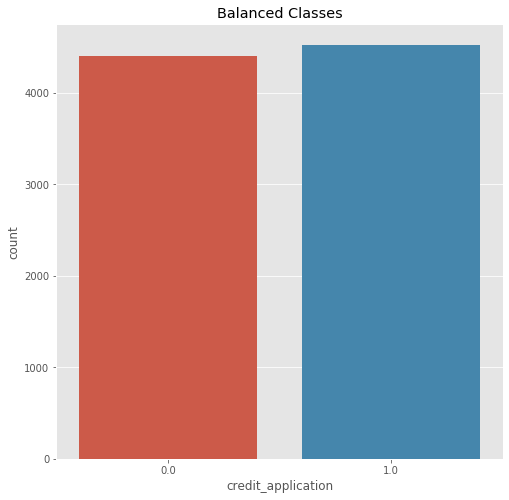

In [47]:
# preprocess the dataset to balance the classes in the target variable
# and take a larger sample size

# shuffle the dataset and select n observations
shuffled_df = data.sample(n=40000,random_state=4, replace=True)

# Put all the credit_application in a separate dataset.
c_app_df = shuffled_df.loc[shuffled_df['credit_application'] == 1]

# Randomly select n observations from the non-fraud (majority class)
c_non_app_df = shuffled_df.loc[shuffled_df['credit_application'] == 0].sample(n=4400,random_state=42, replace=True)

# Concatenate both dataframes again
new_balanced_data = pd.concat([c_app_df, c_non_app_df])

# plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('credit_application', data=new_balanced_data)
plt.title('Balanced Classes')
plt.show()

In [48]:
new_balanced_data.shape

(8929, 60)

In [99]:
new_balanced_data_2 = shuffle(new_balanced_data)

In [51]:
# feature extraction using Univariate Selection
# select a machine learning model to create an object. In this example logistic regression is chosen.

model = lr(solver='lbfgs')
rfe = RFE(model, 8)
fit = rfe.fit(X, y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 8
Selected Features: [False  True False  True  True False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False  True False False False
 False  True  True False  True False False False False False]
Feature Ranking: [ 4  1  6  1  1 19 12  5 14  3 18 21 33 28 34 11 22 37  1 38 24 35 23 31
 13 17  2 39 27 26 15 25  1  9 36 10  8  1  1 30  1 29 20 32 16  7]


In [98]:
features_df_new.head(0).T

""
n_duration
n_previous
n_euribor3m
job_retired
default_unknown
contact_telephone
prev_ctc_outcome_success
month_mar
month_may
month_oct


In [ ]:
d = new_balanced_data[['n_duration', 
                       'n_pdays', 
                       'n_previous', 
                       'n_emp_var_rate', 
                       'n_euribor3m', 
                       'n_nr_employed',
                       'contact_cellular',
                       'contact_telephone',
                       'prev_ctc_outcome_nonexistent',
                       'prev_ctc_outcome_success',
                       'credit_application']]

In [ ]:
train_x, train_y, test_x, test_y, labels = hlp.split_data(d, y='credit_application')

In [100]:
# top 10 predictors and target after removing collinear features and scoring predictors

dd = new_balanced_data_2[['n_duration',
                        'n_previous',
                        'n_euribor3m',
                        'job_retired',
                        'default_unknown',
                        'contact_telephone',
                        'prev_ctc_outcome_success',
                        'month_mar',
                        'month_may',
                        'month_oct',
                        'credit_application']]

In [101]:
train_x, train_y, test_x, test_y, labels = hlp.split_data(dd, y='credit_application')

In [102]:
# input parameter values for the logistic regression object 
# base on values obtained from hyperparameter tuning
L = lr(C=5.0, fit_intercept=False, penalty='l1')

# train the model
LF = L.fit(train_x, train_y)

# output 
predicted = LF.predict(test_x)

# output summary evaluation of metrics
summary = hlp.printModelSummary(test_y, predicted)

Overall accuracy of the model is 87.16 percent
Classification report: 
               precision    recall  f1-score   support

         0.0       0.90      0.83      0.86      1429
         1.0       0.85      0.91      0.88      1499

    accuracy                           0.87      2928
   macro avg       0.87      0.87      0.87      2928
weighted avg       0.87      0.87      0.87      2928

Confusion matrix: 
 [[1191  238]
 [ 138 1361]]
ROC:  0.8706942953804986


In [ ]:
# optimise recall

grid_search_wrapper()

## Dr. Richard Wu's Logistic Regression Homework: Removed Collinear Features

In [103]:
# REMOVED COLLINEAR FEATURES

# input parameter values for the logistic regression object 
# base on values obtained from hyperparameter tuning
L = lr(C=5.0, fit_intercept=False, penalty='l1')

# train the model
LF = L.fit(train_x, train_y)

# output 
predicted = LF.predict(test_x)

# output summary evaluation of metrics
summary = hlp.printModelSummary(test_y, predicted)

Overall accuracy of the model is 87.16 percent
Classification report: 
               precision    recall  f1-score   support

         0.0       0.90      0.83      0.86      1429
         1.0       0.85      0.91      0.88      1499

    accuracy                           0.87      2928
   macro avg       0.87      0.87      0.87      2928
weighted avg       0.87      0.87      0.87      2928

Confusion matrix: 
 [[1191  238]
 [ 138 1361]]
ROC:  0.8706942953804986


In [116]:
grid_search_wrapper()

Best params for recall_score
{'C': 5.0, 'fit_intercept': False, 'penalty': 'l1'}

Confusion matrix of Logistic regression optimised for recall_score on the test data:
Overall accuracy of the model is 87.16 percent
Classification report: 
               precision    recall  f1-score   support

         0.0       0.90      0.83      0.86      1429
         1.0       0.85      0.91      0.88      1499

    accuracy                           0.87      2928
   macro avg       0.87      0.87      0.87      2928
weighted avg       0.87      0.87      0.87      2928

Confusion matrix: 
 [[1191  238]
 [ 138 1361]]
ROC:  0.8706942953804986


(     pred_neg  pred_pos
 neg      1191       238
 pos       138      1361, None)

In [110]:
features =  dd.drop(['credit_application'], axis=1)
target = dd['credit_application']

In [124]:
L = lr(C=5.0, fit_intercept=False, penalty='l1')

scores = cross_val_score(clf, features, target, cv=5, scoring='recall')
print(scores)

[0.87306843 0.89514349 0.86313466 0.88300221 0.87513812]


In [123]:
features.shape

(8929, 11)

# 10. Model Evaluation

Metrics for evaluating predicted class labels:

- Accuracy
- Recall
- Precision
- Specificity
- Sensitivity
- G-Mean
- F1-Measure
- F0.5-Measure
- F2-Measure

Metrics for evaluating predicted probabilities:

- ROC Area Under Curve (ROC AUC).
- Precision Recall Area Under Curve (PR AUC).
- Brier Score
- Matthews correlation coefficient (MCC)

<b> AUC </b>: "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

Source: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

Source: https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall

Source: https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

Source: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

In [ ]:
pd.crosstab(label_train,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

## ROC/AUC

- Receiver Operating Characteristic (ROC): Probability curve

- Area Under the Curve (AUC): Represents degree or measure of separability. The higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. When AUC is 0.7 for example, it means there is 70% chance that model will be able to distinguish between positive class and negative class.

Source: https://towardsdatascience.com/end-to-end-python-framework-for-predictive-modeling-b8052bb96a78

Source: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

Source: https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

In [ ]:
from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()
from sklearn import metrics

In [ ]:
preds = clf.predict_proba(features_train)[:,1]
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), preds)

auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

## Decile Plots and Kolmogorov Smirnov (KS) Statistic

Source: https://towardsdatascience.com/end-to-end-python-framework-for-predictive-modeling-b8052bb96a78

## Notes: Target Leakage

Target leakage occurs when a variable that is not a feature is used to predict the target.

For example, if your training dataset that was normalized or standardized using missing value imputation (such as min, max, mean) - such that the training dataset had full knowledge of the distribution of data in the training dataset. An unseen dataset would not have any knowledge of the distribution of data in the dataset - that is, a row in the unseen dataset would not know if there were three records or three million other records. It wouldn't be able to normalize or standardize itself using unseen data. As a result, the model ends up overfitting to the training data and produces a higher accuracy when run on unseen data than it would if the model had not fit the training dataset so well (too well).

Source: http://downloads.alteryx.com/betawh_xnext/MachineLearning/MLTargetLeakage.htm